In [1]:
# NOTE - REMEMBER TO UPDATE THE CSV AND RINK IMAGE LINKS TO THE FILES UPLOADED TO GIT HUB

In [2]:
# Importing the necessary packages for this section

In [3]:
# Import numpy and pandas for data analyis
import numpy as np
import pandas as pd

In [4]:
# Import matplotlib and seaborn for data visualisation
import matplotlib as plt
import matplotlib.image as mpimg
rink_img = mpimg.imread(r'C:\Users\zomgj\Downloads\hockey_rink.png') # this is an image background for shot charts
import seaborn as sns

In [5]:
# Import statsmodels and math to execute regressions
import statsmodels.formula.api as smf
import math

In [6]:
# Import scikit-learn for machine learning model
import sklearn.ensemble as sken
import sklearn.linear_model as sklm
import sklearn.model_selection as skms

In [7]:
# Import the relevant dataset
# This is csv containing data for all shots recorded during the 2021-2022 NHL season. It was sourced from https://www.moneypuck.com/data.htm
# A supporting data dictionary has been uploaded to the github repository, but will not be imported here.

shots_df = pd.read_csv(r'C:\Users\zomgj\Downloads\shots_2021.csv')

In [8]:
shots_df.head()

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
0,0,42.520583,61.0,61.0,-32.0,32.0,-8.4,0,0,0,...,61,0.202514,0.009192,0.445979,0.289830,0.023891,0.028594,0.718082,-32,-32
1,1,30.610456,-65.0,65.0,19.0,19.0,21.4,0,0,0,...,65,0.285948,0.031353,0.303080,0.325607,0.026384,0.027629,0.793188,19,-19
2,2,85.381497,-8.0,8.0,-27.0,27.0,3.8,0,0,0,...,8,0.161225,0.012753,0.307661,0.486296,0.019218,0.012846,0.840122,-27,27
3,3,29.274562,-60.0,60.0,-4.0,4.0,0.0,0,0,0,...,60,0.161623,0.121753,0.374061,0.264891,0.024508,0.053163,0.729294,-4,4
4,4,26.305893,63.0,63.0,4.0,4.0,0.0,0,0,0,...,63,0.116379,0.088392,0.432747,0.284554,0.018850,0.059078,0.695010,4,4


In [9]:
# shotID is already a functionl index, so I will set it as such and drop the default index

shots_df.set_index('shotID', inplace=True) 

In [10]:
# There is far more information in this dataset than I require for this project
# I want to visualise shots to draw insights on how shot location and success is affected by other factors
# I'm interested in Shot Distance, Shot x and y Coordinates, Shot type, Shot outcome and the shooting player's position
# Therefore, I will slice the relevant columns into a new dataframe for analysis

shot_info = shots_df[['shotDistance', 'xCordAdjusted', 'yCordAdjusted','shotType', 'event', 'playerPositionThatDidEvent']]
shot_info.head()

,shotDistance,xCordAdjusted,yCordAdjusted,shotType,event,playerPositionThatDidEvent
shotID,,,,,,
0,42.520583,61,-32,WRIST,SHOT,C
1,30.610456,65,-19,WRIST,SHOT,L
2,85.381497,8,27,WRIST,SHOT,D
3,29.274562,60,4,WRIST,SHOT,L
4,26.305893,63,4,WRIST,SHOT,L


In [11]:
# These column names are not as clean or informative as they could be, so I will tidy them up.

shot_info_rename = shot_info.rename(columns={'event': 'Shot Outcome','playerPositionThatDidEvent': 'Shooter Position', 'xCordAdjusted': 'xCord', 'yCordAdjusted': 'yCord'})
shot_info_rename.head()

,shotDistance,xCord,yCord,shotType,Shot Outcome,Shooter Position
shotID,,,,,,
0,42.520583,61,-32,WRIST,SHOT,C
1,30.610456,65,-19,WRIST,SHOT,L
2,85.381497,8,27,WRIST,SHOT,D
3,29.274562,60,4,WRIST,SHOT,L
4,26.305893,63,4,WRIST,SHOT,L


In [12]:
# Cleaning the Data

# I will check the shot_info df for missing data. It is not expected to find significant missing data as this datset is highly curated by Moneypuck.com
# I will not check for duplicates as each shot recorded has already been assigned a unique ID. It is not expected that there is any duplication of shots, and many individual shotIDs might share the same information. Therefore, dropping duplicates could incorrectly reduce the dataset.

In [13]:
# checking for missing values
missing_values = shot_info_rename.isnull().sum()
missing_values.head()

shotDistance    0
xCord           0
yCord           0
shotType        5
Shot Outcome    0
dtype: int64

In [14]:
# Dropping the rows where the shotType is missing. Since the number of missing values is tiny in the context of the dataset, I will not attempt to fill them.
# However, if I were to do so, a bfill method might be appropriate - shot_info.fillna(method='bfill', axis=0).fillna(0)

shot_info_rename.dropna(inplace=True)


In [15]:
# Since I have both x and y coordinates for each shot, I can map them in a scatter plot
# The x value is the horizontal distance from the goal line and the y value is the vertical distance from centre-ice

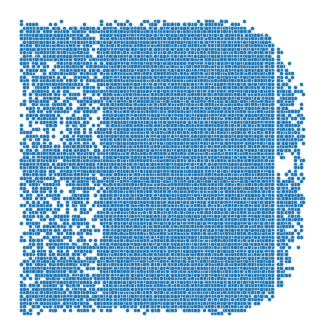

In [16]:
shot_chart = sns.relplot(data=shot_info_rename, x='xCord', y='yCord', kind='scatter', s=15)
shot_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shot_chart.despine(left=True, bottom=True)


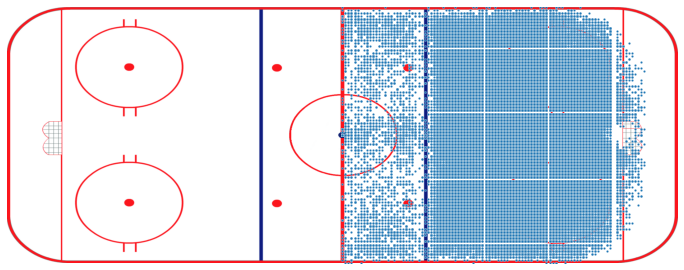

In [17]:
# This resembles a shot distribution nomralised so that all shots are made against the same goal. 
# Adding the ice-rink visual to make better sense of the shot distribution.

shot_chart = sns.relplot(data=shot_info_rename, x='xCord', y='yCord', kind='scatter', height=10, s=5)
shot_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shot_chart.despine(left=True, bottom=True)
for ax in shot_chart.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])

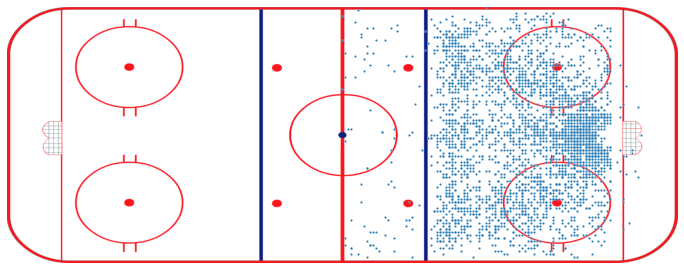

In [18]:
# It is difficult to make sense of the data with this visualisation as we are mapping c. 120,000 shots to a limited area. 
# Accordingly, almost all possible x and y coordinate pairs will be plotted.
# In order to make sense of the data, I will cut the shot sample size down to the first 3,500 shots from the shot_info_rename dataframe.

shot_info_reduced = shot_info_rename.iloc[0:3501, :]

shot_chart_reduced = sns.relplot(data=shot_info_reduced, x='xCord', y='yCord', kind='scatter', height=10, s=5)
shot_chart_reduced.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shot_chart_reduced.despine(left=True, bottom=True)
for ax in shot_chart_reduced.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])


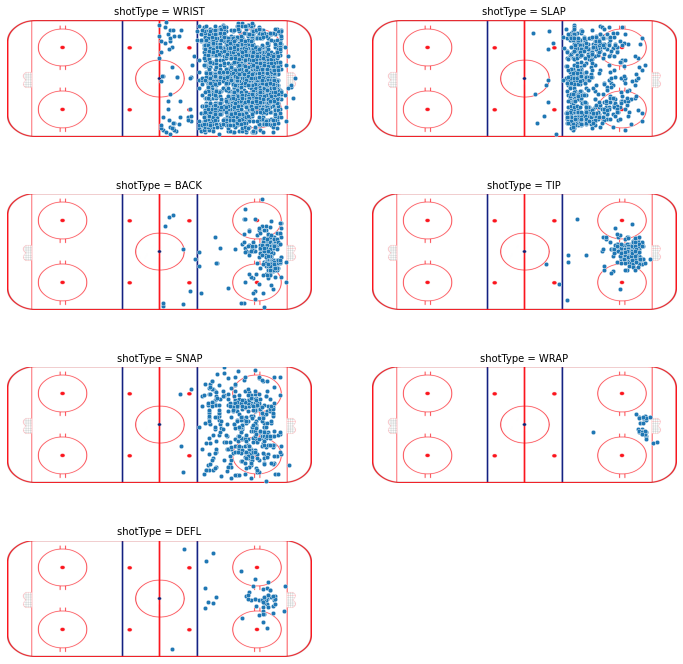

In [19]:
# We can see how each shot types are concentrated by position in the rink.

# Wrist shots are the most common shot type and players will attempt them from all parts of the rink.
# Slap shots tend to be taken from closer to the blue line.
# Backhand shots are typically taken much closer to the net as they do not have as much power as wrist or slap shots.
# Tipped shots are clustered between the faceoff circles right infront of the gaol mouth (the area known as "the slot").
# Snap shots - like wrist shots - are taken from all parts of the ice, but at a much lower frequency than wrist shots.
# Wraparound shots take place right in front of the goal. Due to the nature of this shot type - where the player skates the puck behind the net before "wrapping around" it to shoot - any Wraparound shots located beyond the area immediately in front of the goal are likely cases of misclassification by the official scorer.


shotType_chart = sns.relplot(data=shot_info_reduced,col = 'shotType',col_wrap=2, x='xCord', y='yCord', kind='scatter', height=5, s=20)
shotType_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shotType_chart.despine(left=True, bottom=True)
shotType_chart.fig.subplots_adjust(hspace=-0.8, wspace=0.2)
for ax in shotType_chart.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])

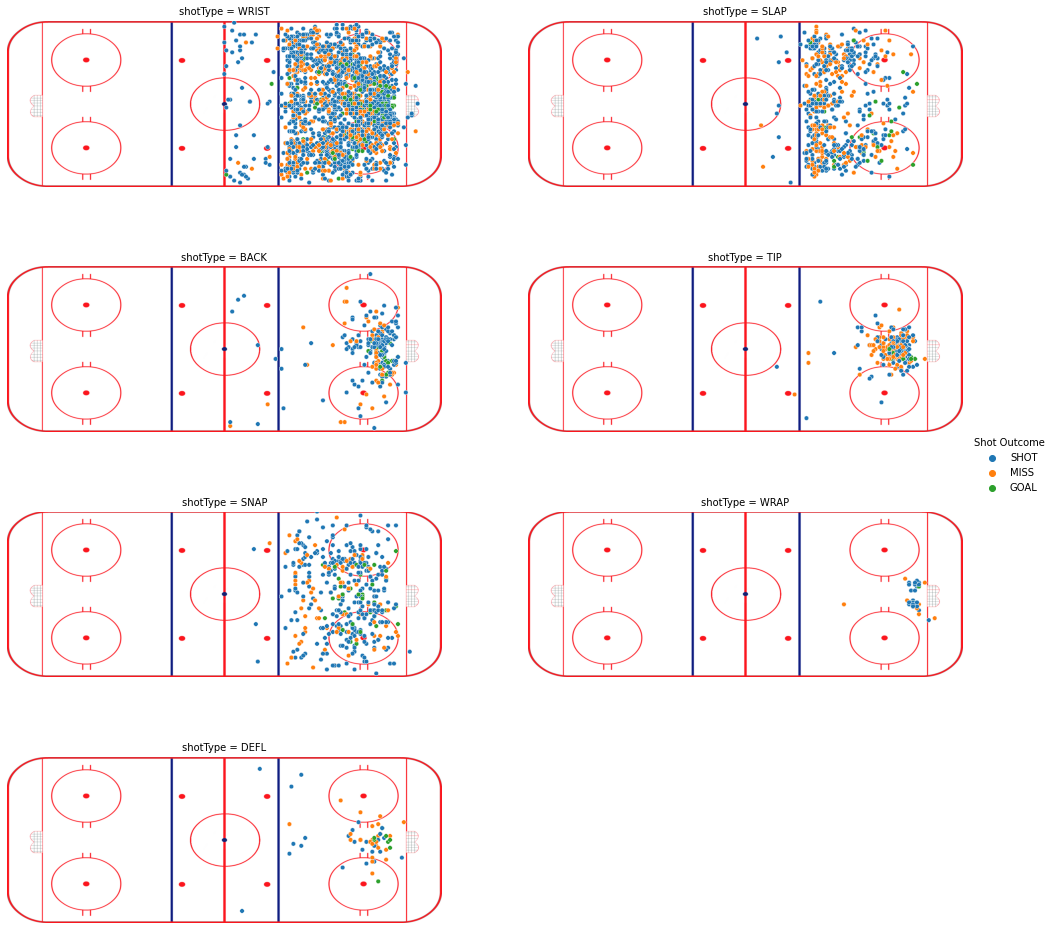

In [20]:
# Visualising the shot data by Shot Outcome - either a shot on goal, a miss or a goal
# We can see that players score more often by shooting from closer to the goal, regardless of the shot type


shotType_chart = sns.relplot(data=shot_info_reduced,col = 'shotType',hue='Shot Outcome' , col_wrap=2, x='xCord', y='yCord', kind='scatter', height=7, s=20)
shotType_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shotType_chart.despine(left=True, bottom=True)
shotType_chart.fig.subplots_adjust(hspace=-0.8, wspace=0.2)
for ax in shotType_chart.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])

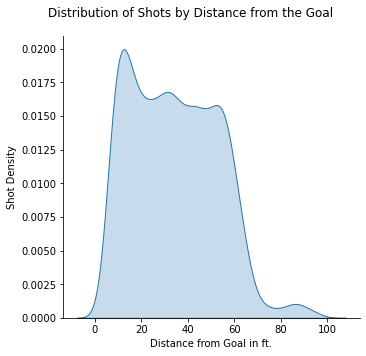

In [21]:
# Now I want to look at the density of shots by distance from the Goal
# When shot density is visualised, it is clear that the vast majority of shots are taken within 80 feet of the goal, and players have a preference to shoot from within 20 feet if possible.
# Note the x-axis starts from below zero - this is because the area behind the goal is still in play and some shots are made from behind the goal

g = sns.FacetGrid(shot_info_reduced, height = 5).map(sns.kdeplot, 'shotDistance', shade=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Shots by Distance from the Goal')
g.set(xlabel = 'Distance from Goal in ft.', ylabel= 'Shot Density')


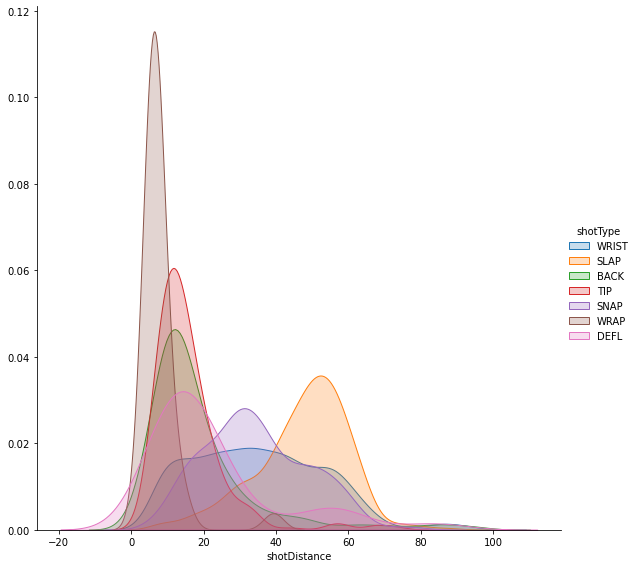

In [22]:
# By adding shot type information, we can see how players elect to take shots based on distance
# Wrap around shots are taken within 5 feet of the net by the nature of that shot
# Players attempt to Tip and Deflect shots from close to the goal - within 20 feet
# Players take backhand shots from closer to the goal (within 20ft) than wrist or snap shots, as the  backhand is a weaker shot
# Slap shots are more powerful, but players need to "wind up" this shot, which leaves them vulnerable to being disposessed of the puck. Players therefore take slap shots farther from the net where they are less likely to be disrupted.


g = sns.FacetGrid(shot_info_reduced, hue='shotType', height = 8).map(sns.kdeplot, 'shotDistance', shade=True)
g.add_legend()

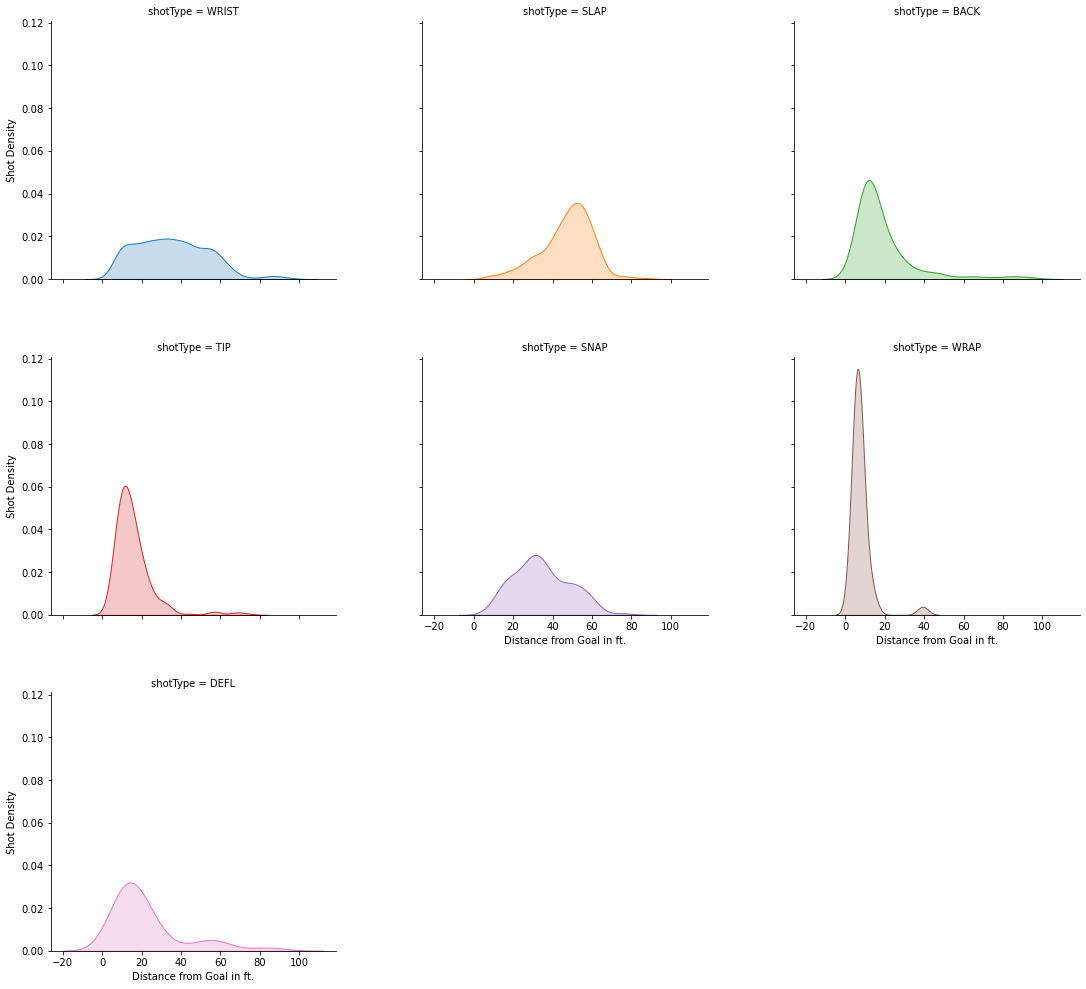

In [23]:
# Visualising density of each shot type individually.
g = (sns.FacetGrid(shot_info_reduced, col='shotType', hue='shotType', height=5, col_wrap=3).map(sns.kdeplot, 'shotDistance', shade=True))
g.set(xlabel = 'Distance from Goal in ft.', ylabel= 'Shot Density')
g.fig.subplots_adjust(top=0.9, hspace=0.3, wspace=0.3)

In [24]:
# Player Info

playerinf = pd.read_csv(r'C:\Users\zomgj\Downloads\allPlayersLookup.csv')
playerinf.dropna(inplace = True)
playerinf.sample(15)

,playerId,name,position,team,birthDate,weight,height,nationality,shootsCatches,primaryNumber,primaryPosition
75,8472248,Jared Ross,C,PHI,9/18/1982,175.0,70.0,USA,L,42.0,C
2411,8475772,Riley Sheahan,C,BUF,12/7/1991,214.0,75.0,CAN,L,15.0,C
446,8475727,Ryan Spooner,C,VAN,1/30/1992,191.0,71.0,CAN,L,23.0,C
2418,8481521,Ronnie Attard,D,PHI,3/20/1999,208.0,75.0,USA,R,47.0,D
832,8476476,Joe Morrow,D,WPG,12/9/1992,196.0,72.0,CAN,L,70.0,D
440,8476834,Roman Cervenka,C,CGY,12/10/1985,201.0,71.0,CZE,L,10.0,C
1587,8473440,Will O'Neill,D,PHI,4/28/1988,190.0,73.0,USA,L,45.0,D
1902,8462047,Martin Biron,G,NYR,8/15/1977,186.0,74.0,CAN,L,43.0,G
2182,8478868,Christian Jaros,D,NJD,4/2/1996,201.0,75.0,SVK,R,83.0,D
1644,8474651,Braden Holtby,G,DAL,9/16/1989,211.0,74.0,CAN,L,70.0,G


Text(0.5, 0.98, 'Player Height / Weight Distribution')

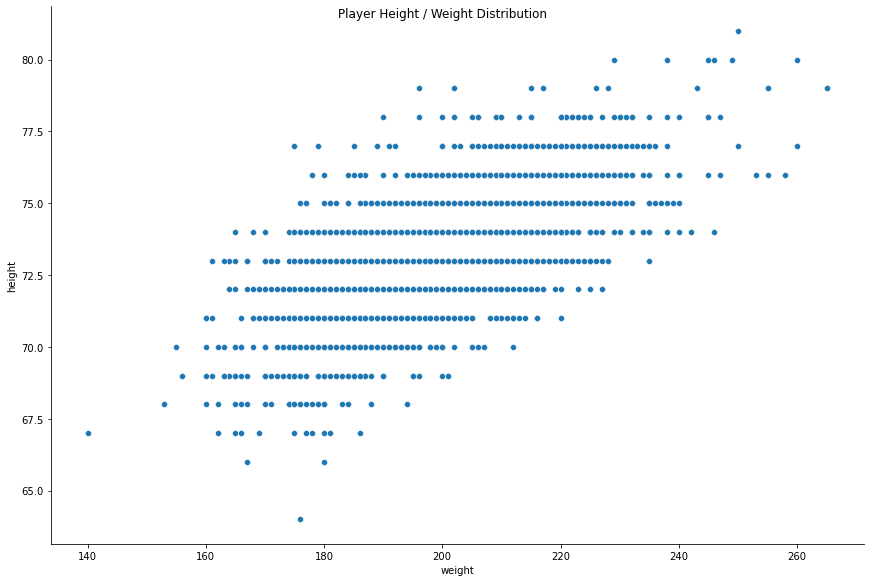

In [25]:
# Plotting the player height and weights on a scatter
g = sns.relplot(x='weight', y='height', data=playerinf, height=8, aspect=6/ 4)
g.fig.suptitle('Player Height / Weight Distribution')

In [26]:
# We can see a clear positive relationship between players' height and weight/
# The plot resembles a grid as player height and weight are recorded in whole numbers by the league.
# In reality, the heights and weights should vary ever so slightly from the recorded figures. I will add this with jitter, bringing in a random variation of 1lb to weight and 1inch to height.

import random

playerinf['jitheight'] = (playerinf['height']).apply(lambda x: x + random.gauss(0, 1))
playerinf['jitweight'] = (playerinf['weight']).apply(lambda x: x + random.gauss(0, 1))

Text(0.5, 0.98, 'Jittered Player Height / Weight Distribution')

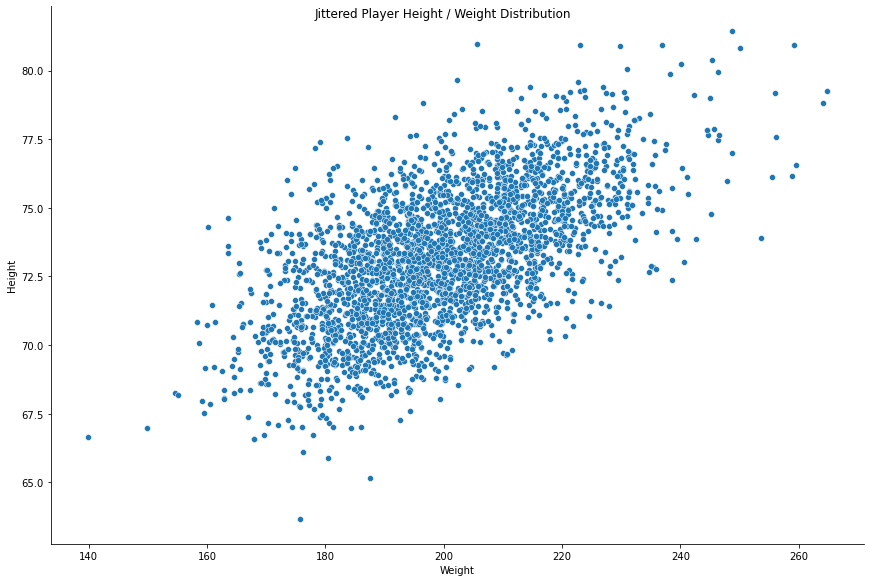

In [27]:
# We can see that NHL players are - by normal standards - tall and heavy. 
# Very few players who are shorter than 5'10 or lighther than 180lbs will make it to the NHL.

g = sns.relplot(x='jitweight', y='jitheight', data=playerinf, height=8, aspect=6/ 4)
g.set(xlabel = 'Weight', ylabel= 'Height')
g.fig.suptitle('Jittered Player Height / Weight Distribution')

Text(0.5, 0.98, 'Jittered Player Height / Weight Distribution by Player Position')

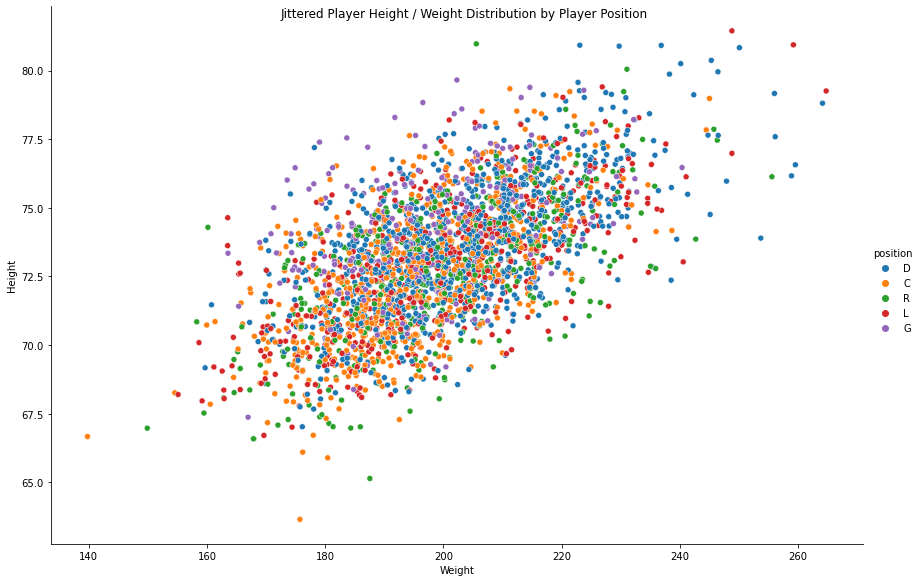

In [28]:
# I'll now look at adding player position to the plot to get a sense of whether certain positions tend to be taller or heavier

g = sns.relplot(x='jitweight', y='jitheight', hue='position', data=playerinf, height=8, aspect=6/ 4)
g.set(xlabel = 'Weight', ylabel= 'Height')
g.fig.suptitle('Jittered Player Height / Weight Distribution by Player Position')

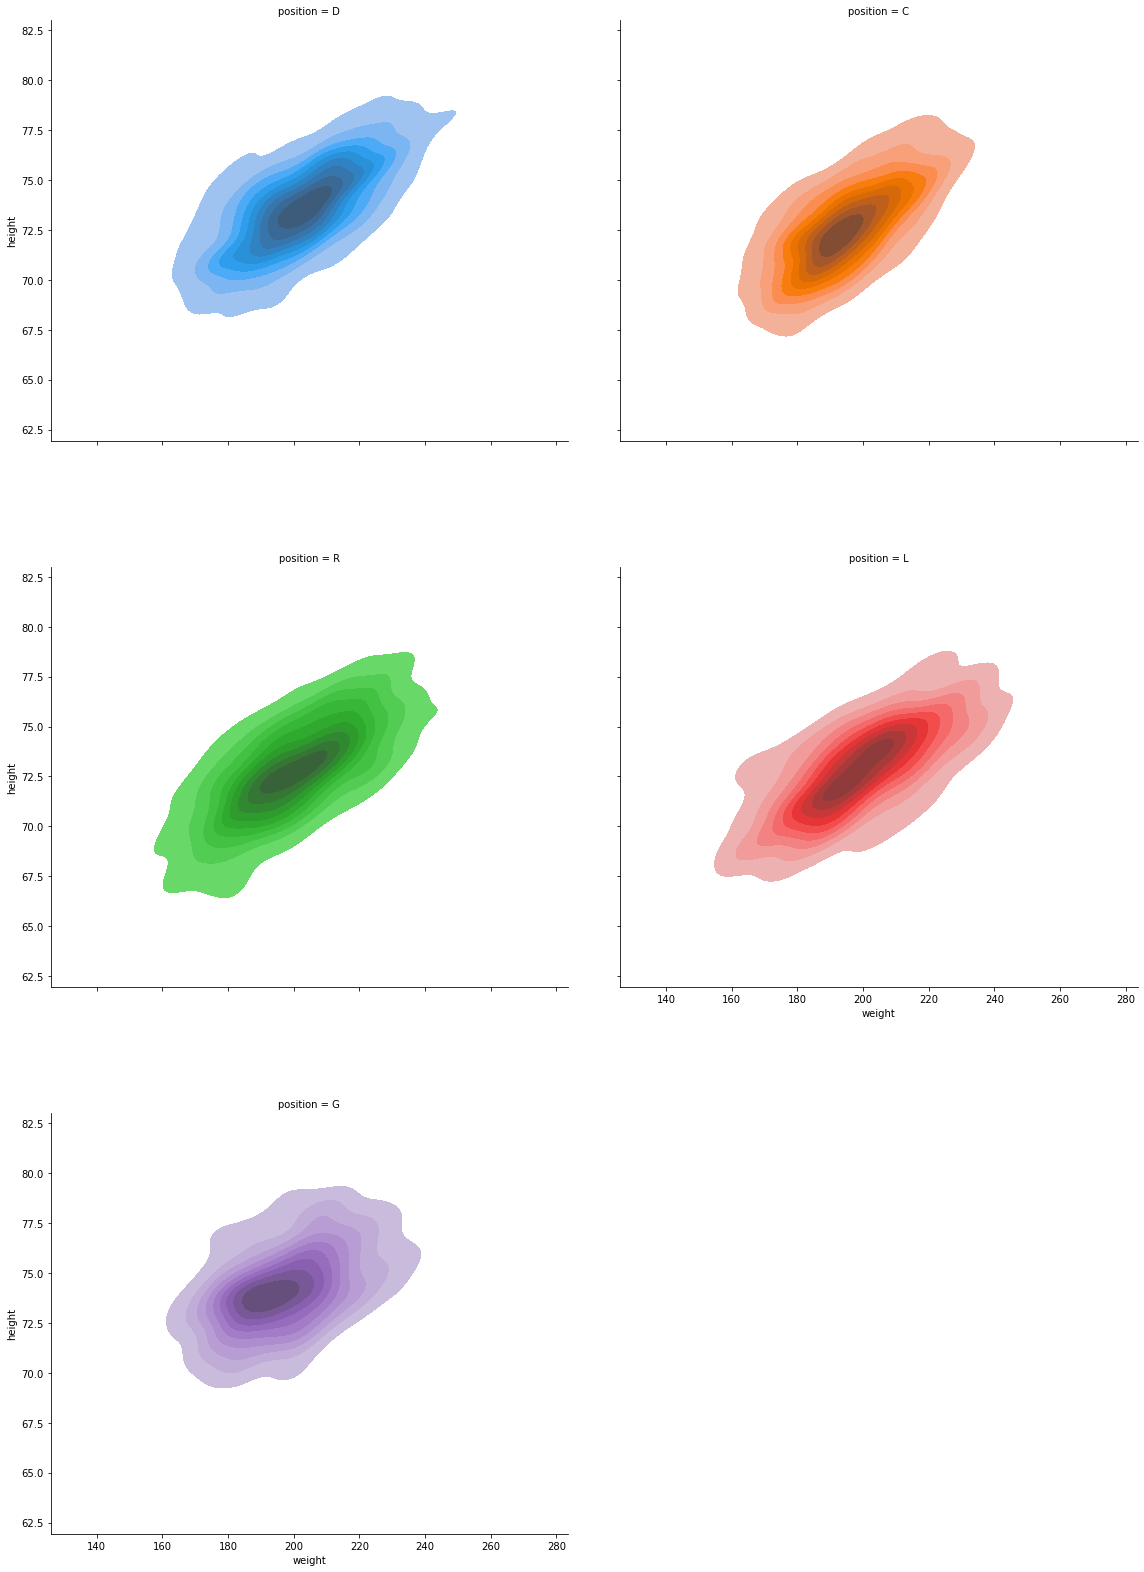

In [29]:
# By using a contour plot and assigning the hue to player position, I can get a better sense of the distribution
# Defenders tend to be taller and heavier than forwards
# Centers tend to be smaller and slightly lighter than the wingers (R & L) that they play with
# Goalies tend to be significantly taller than outfield players


g = (sns.FacetGrid(playerinf, col='position', hue='position', col_wrap=2, height = 8)
     .map(sns.kdeplot, 'weight', 'height', shade=True))
g.fig.subplots_adjust(top=0.9, hspace=0.3, wspace=0.1)



In [30]:
# START THE REGRESSION MODELLING COMMENTARY HERE

In [31]:
shot_info.head()

,shotDistance,xCordAdjusted,yCordAdjusted,shotType,event,playerPositionThatDidEvent
shotID,,,,,,
0,42.520583,61,-32,WRIST,SHOT,C
1,30.610456,65,-19,WRIST,SHOT,L
2,85.381497,8,27,WRIST,SHOT,D
3,29.274562,60,4,WRIST,SHOT,L
4,26.305893,63,4,WRIST,SHOT,L


In [32]:
# In order to run a model, I will need:
# a single boolean column to distinguish shots that are goals from all other shots.
# the shotDistance
# the square of the shotDistance
# shotType


shot_info['Goal'] = shot_info['event'] == 'GOAL' # creating the boolean goal column 
shot_info['Goal'] = shot_info['Goal'].astype(int) # converting Goal column to an integer to allow it to act as the dummy variable for use in model
shot_info['shotDistance_sq'] = shot_info['shotDistance']**2 # creating column for square of shot distance
shot_info.drop('xCordAdjusted', axis=1, inplace=True) # dropping unnecessary column
shot_info.drop('yCordAdjusted', axis=1, inplace=True) # dropping unnecessary column
shot_info.drop('playerPositionThatDidEvent', axis=1, inplace=True) # dropping unnecessary column
shot_info.head()


<ipython-input-32-d9e5ee47e297>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_info['Goal'] = shot_info['event'] == 'GOAL' # creating the boolean goal column
<ipython-input-32-d9e5ee47e297>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_info['Goal'] = shot_info['Goal'].astype(int) # converting Goal column to an integer to allow it to act as the dummy variable for use in model
<ipython-input-32-d9e5ee47e297>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,shotDistance,shotType,event,Goal,shotDistance_sq
shotID,,,,,
0,42.520583,WRIST,SHOT,0,1808.0
1,30.610456,WRIST,SHOT,0,937.0
2,85.381497,WRIST,SHOT,0,7290.0
3,29.274562,WRIST,SHOT,0,857.0
4,26.305893,WRIST,SHOT,0,692.0


In [33]:
# Filtering for all shotIDs that resulted in a Goal to check function. The value for 'Goal' is 1 where the value for 'event' is GOAL/
shot_info.loc[shot_info['event'] == 'GOAL']


,shotDistance,shotType,event,Goal,shotDistance_sq
shotID,,,,,
27,17.492856,SNAP,GOAL,1,306.0
32,17.117243,WRIST,GOAL,1,293.0
70,47.010637,WRIST,GOAL,1,2210.0
76,14.035669,TIP,GOAL,1,197.0
77,29.529646,WRIST,GOAL,1,872.0
...,...,...,...,...,...
121370,39.623226,WRIST,GOAL,1,1570.0
121385,30.675723,WRIST,GOAL,1,941.0
4,10.049876,WRIST,GOAL,1,101.0


In [34]:
model = smf.ols(formula='Goal ~ shotDistance + shotDistance_sq', data=shot_info)

In [35]:
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.030     
Dependent Variable: Goal             AIC:                11702.2765
Date:               2022-11-17 17:54 BIC:                11731.3988
No. Observations:   121471           Log-Likelihood:     -5848.1   
Df Model:           2                F-statistic:        1887.     
Df Residuals:       121468           Prob (F-statistic): 0.00      
R-squared:          0.030            Scale:              0.064469  
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           0.1927   0.0024  79.4068 0.0000  0.1880  0.1975
shotDistance       -0.0056   0.0001 -39.4249 0.0000 -0.0059 -0.0053
shotDistance_sq     0.0000   0.0000  24.7984 0.0000  0.0000  0.0000
-------------------------------------------------------------------
Omnibus:             76797.227     Durbin-Watson:        2.012     
Prob(Omnibus):       0.000         Jarque-Bera (JB):     569874.326
Skew:                3.171         Prob(JB):             0.000     
Kurtosis:            11.507        Condition No.:        6874      
===================================================================
* The condition number is large (7e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [36]:
# shotDistance_sq value is rounded too low to see - so I will display it via results.params
results.params

Intercept          0.192728
shotDistance      -0.005583
shotDistance_sq    0.000045
dtype: float64

In [37]:
# Defining a function to predict the probability of a goal using the information from model fitting

def prob_of_goal(shotDistance):
    b0, b1, b2 = results.params
    return (b0 + b1*shotDistance + b2*(shotDistance**2)) # I am squaring the shot distance as the effect of distance is not expected to be equal across all cases. Moving shot distance from 1ft to 5ft is expected to reduce the probability of scoring more than moving from 35ft to 40ft.

In [74]:
# Checking if our probability of a goal decreases when shot distance increases, as expected
prob_of_goal(5)

0.16593608151603767

In [39]:
prob_of_goal(10)

0.14138543248295282

In [40]:
prob_of_goal(20)

0.09900913586545479

In [41]:
# predicting the results for all shots in shot_info and comparing to the actual recorded outcome

shot_info['Goal_hat'] = results.predict(shot_info)

<ipython-input-41-29f6649856d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_info['Goal_hat'] = results.predict(shot_info)


In [42]:
# Displaying calculated probability against the recorded outcome for a random sample of 25 shots in shot_info

shot_info[['Goal', 'Goal_hat']].sample(25)

,Goal,Goal_hat
shotID,,
56244,0,0.055766
58581,0,0.165428
30412,0,0.112234
18108,0,0.068178
72064,0,0.033231
110193,0,0.020257
100616,0,0.019520
22532,0,0.098164
114287,0,0.149742


In [43]:
# Logistic Regression



In [44]:
shot_info.head()

,shotDistance,shotType,event,Goal,shotDistance_sq,Goal_hat
shotID,,,,,,
0,42.520583,WRIST,SHOT,0,1808.0,0.036410
1,30.610456,WRIST,SHOT,0,937.0,0.063850
2,85.381497,WRIST,SHOT,0,7290.0,0.042910
3,29.274562,WRIST,SHOT,0,857.0,0.067722
4,26.305893,WRIST,SHOT,0,692.0,0.076897


In [45]:
# dropping the Goal_hat column from our linear regression
shot_info.drop('Goal_hat', axis=1, inplace=True)
shot_info.head()

C:\Users\zomgj\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,shotDistance,shotType,event,Goal,shotDistance_sq
shotID,,,,,
0,42.520583,WRIST,SHOT,0,1808.0
1,30.610456,WRIST,SHOT,0,937.0
2,85.381497,WRIST,SHOT,0,7290.0
3,29.274562,WRIST,SHOT,0,857.0
4,26.305893,WRIST,SHOT,0,692.0


In [46]:
model_logistic = smf.logit(formula='Goal ~ shotDistance', data=shot_info)

In [47]:
results_logistic = model_logistic.fit()
results_logistic.summary2()

Optimization terminated successfully.
         Current function value: 0.243553
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.055     
Dependent Variable: Goal             AIC:              59173.2501
Date:               2022-11-17 17:54 BIC:              59192.6649
No. Observations:   121471           Log-Likelihood:   -29585.   
Df Model:           1                LL-Null:          -31309.   
Df Residuals:       121469           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -1.4227   0.0211 -67.4470 0.0000 -1.4640 -1.3813
shotDistance     -0.0406   0.0008 -53.4524 0.0000 -0.0420 -0.0391
=================================================================

"""

In [48]:
results_logistic.params

Intercept      -1.422681
shotDistance   -0.040562
dtype: float64

In [49]:
# Defining a function to predict the probability of a goal using the information from model fitting

def prob_goal_logistic(shotDistance):
    b0, b1 = results_logistic.params
    value = (b0 + b1*shotDistance)
    return 1/(1 + math.exp(-value))

In [50]:
prob_goal_logistic(5)

0.16444884943935284

In [51]:
prob_goal_logistic(15)

0.11597467076851235

In [52]:
prob_goal_logistic(40)

0.04542651411383013

In [53]:
# predicting the results for all shots in shot_info and comparing to the actual recorded outcome

shot_info['Goal_hat_logistic'] = results_logistic.predict(shot_info)

<ipython-input-53-641218d55dce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_info['Goal_hat_logistic'] = results_logistic.predict(shot_info)


In [54]:
# Displaying calculated probability against the recorded outcome for a random sample of 25 shots in shot_info

shot_info[['Goal', 'Goal_hat_logistic']].sample(25)

,Goal,Goal_hat_logistic
shotID,,
57591,0,0.028842
96671,0,0.074564
27176,0,0.026252
70215,0,0.138199
50685,0,0.078026
113254,0,0.041193
6387,0,0.065600
24596,0,0.076311
14333,0,0.046207


In [55]:
# Random Forest

In [56]:
#
# continuous variables: shot distance, shot coordinates, shot angle, the amount of time the shooter was on the ice without rest before they took the shot
# categorical variables: was the shot off the rush, did the shot generate a rebound, shooter position, shooter handedness, was the shooter on their off wing

In [57]:
shots_df.head()

,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,awaySkatersOnIce,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
shotID,,,,,,,,,,,,,,,,,,,,,
0,42.520583,61.0,61.0,-32.0,32.0,-8.4,0,0,0,5,...,61,0.202514,0.009192,0.445979,0.289830,0.023891,0.028594,0.718082,-32,-32
1,30.610456,-65.0,65.0,19.0,19.0,21.4,0,0,0,5,...,65,0.285948,0.031353,0.303080,0.325607,0.026384,0.027629,0.793188,19,-19
2,85.381497,-8.0,8.0,-27.0,27.0,3.8,0,0,0,5,...,8,0.161225,0.012753,0.307661,0.486296,0.019218,0.012846,0.840122,-27,27
3,29.274562,-60.0,60.0,-4.0,4.0,0.0,0,0,0,5,...,60,0.161623,0.121753,0.374061,0.264891,0.024508,0.053163,0.729294,-4,4
4,26.305893,63.0,63.0,4.0,4.0,0.0,0,0,0,5,...,63,0.116379,0.088392,0.432747,0.284554,0.018850,0.059078,0.695010,4,4


In [58]:
# establishing my continuous variables from shots_df
cont_vars = ['shotDistance', 'xCordAdjusted', 'yCordAdjusted', 'shotAngleAdjusted', 'shooterTimeOnIceSinceFaceoff']

In [59]:
#establishing my categorical variables from shots_df
cat_vars = ['shotGeneratedRebound', 'shotRush', 'playerPositionThatDidEvent', 'shooterLeftRight', 'offWing']

In [60]:

df_cat = pd.concat([pd.get_dummies(shots_df[x]) for x in cat_vars], axis = 1)
df_cat.head(25)

,0,1,0,1,C,D,G,L,R,L,R,0,1
shotID,,,,,,,,,,,,,
0,1,0,1,0,1,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,0,1,0,1,0,0,1
2,1,0,1,0,0,1,0,0,0,0,1,0,1
3,1,0,1,0,0,0,0,1,0,1,0,1,0
4,1,0,1,0,0,0,0,1,0,1,0,1,0
5,1,0,1,0,0,1,0,0,0,0,1,0,1
6,1,0,1,0,1,0,0,0,0,1,0,1,0
7,1,0,1,0,0,1,0,0,0,1,0,1,0
8,1,0,0,1,0,0,0,0,1,0,1,0,1


In [61]:
df_combined = pd.concat([shots_df[cont_vars], df_cat], axis = 1)
df_combined['shotType'] = shots_df['shotType']
df_combined.sample(15)

,shotDistance,xCordAdjusted,yCordAdjusted,shotAngleAdjusted,shooterTimeOnIceSinceFaceoff,0,1,0,1,C,D,G,L,R,L,R,0,1,shotType
shotID,,,,,,,,,,,,,,,,,,,
72157,50.960769,40,14,15.945396,47,1,0,1,0,0,0,0,1,0,1,0,1,0,WRIST
68041,58.830264,39,31,31.798913,6,1,0,1,0,0,1,0,0,0,1,0,1,0,SLAP
29852,24.351591,81,-23,70.820992,22,1,0,1,0,0,0,0,1,0,1,0,0,1,SNAP
107680,35.341194,74,32,64.885165,27,1,0,1,0,0,1,0,0,0,1,0,1,0,WRIST
97777,46.010868,43,-1,1.245364,26,1,0,1,0,0,0,0,0,1,0,1,1,0,SNAP
61383,26.000000,65,10,22.619865,47,1,0,1,0,1,0,0,0,0,1,0,1,0,WRIST
5872,36.359318,58,19,31.504267,32,1,0,1,0,0,0,0,0,1,1,0,1,0,WRIST
21216,40.521599,50,11,15.751174,6,1,0,1,0,1,0,0,0,0,1,0,1,0,SNAP
85045,19.924859,70,6,17.525568,45,1,0,1,0,1,0,0,0,0,1,0,1,0,WRIST


In [62]:
# we know there are null values for shotType as seen earlier in this notebook
null_values = df_combined.isnull().sum()
null_values.head(19)

shotDistance                    0
xCordAdjusted                   0
yCordAdjusted                   0
shotAngleAdjusted               0
shooterTimeOnIceSinceFaceoff    0
0                               0
1                               0
0                               0
1                               0
C                               0
D                               0
G                               0
L                               0
R                               0
L                               0
R                               0
0                               0
1                               0
shotType                        5
dtype: int64

In [63]:
# Dropping null values
df_combined.dropna(inplace=True)

In [64]:
# setting up variables. The x variables (i.e. continuos and categorical) will predict the y variable (shot type)
yvar = 'shotType'
xvars = cont_vars + list(df_cat.columns)

In [65]:
# Training the model
# Holdout set is

train, test = skms.train_test_split(df_combined, test_size=0.33)

In [66]:
forest_model = sken.RandomForestClassifier(n_estimators=100)
forest_model.fit(train[xvars], train[yvar])

RandomForestClassifier()

In [67]:
# let's test

test['shotType_hat'] = forest_model.predict(test[xvars])

<ipython-input-67-e3174282e624>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['shotType_hat'] = forest_model.predict(test[xvars])


In [68]:
test ['correct'] = (test['shotType_hat']) == test['shotType']

<ipython-input-68-b47cc7845dc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test ['correct'] = (test['shotType_hat']) == test['shotType']


In [69]:
test['correct'].mean()

0.47016265841732363

In [70]:
Prob_table = pd.DataFrame(forest_model.predict_proba(test[xvars]),
index=test.index,
columns=forest_model.classes_)
Prob_table.head(10)

,BACK,DEFL,SLAP,SNAP,TIP,WRAP,WRIST
shotID,,,,,,,
100517,0.00,0.00,0.229833,0.180,0.00,0.00,0.590167
33162,0.00,0.00,0.030000,0.240,0.00,0.00,0.730000
57063,0.00,0.00,0.340000,0.060,0.00,0.00,0.600000
113414,0.01,0.00,0.090000,0.070,0.00,0.00,0.830000
43511,0.00,0.02,0.000000,0.790,0.00,0.00,0.190000
66245,0.00,0.00,0.140000,0.341,0.00,0.00,0.519000
30438,0.17,0.01,0.000000,0.080,0.00,0.04,0.700000
79997,0.00,0.00,0.070000,0.030,0.00,0.00,0.900000
114338,0.01,0.00,0.260000,0.030,0.01,0.00,0.690000


In [71]:
Prob_results = pd.concat([test[['shotType','shotType_hat','correct']],Prob_table], axis=1)
Prob_results.head(10)

,shotType,shotType_hat,correct,BACK,DEFL,SLAP,SNAP,TIP,WRAP,WRIST
shotID,,,,,,,,,,
100517,SLAP,WRIST,False,0.00,0.00,0.229833,0.180,0.00,0.00,0.590167
33162,WRIST,WRIST,True,0.00,0.00,0.030000,0.240,0.00,0.00,0.730000
57063,SLAP,WRIST,False,0.00,0.00,0.340000,0.060,0.00,0.00,0.600000
113414,WRIST,WRIST,True,0.01,0.00,0.090000,0.070,0.00,0.00,0.830000
43511,TIP,SNAP,False,0.00,0.02,0.000000,0.790,0.00,0.00,0.190000
66245,WRIST,WRIST,True,0.00,0.00,0.140000,0.341,0.00,0.00,0.519000
30438,WRIST,WRIST,True,0.17,0.01,0.000000,0.080,0.00,0.04,0.700000
79997,WRIST,WRIST,True,0.00,0.00,0.070000,0.030,0.00,0.00,0.900000
114338,SLAP,WRIST,False,0.01,0.00,0.260000,0.030,0.01,0.00,0.690000


In [72]:
Prob_results.groupby('shotType')[['correct', 'WRIST','SNAP','SLAP','BACK','DEFL','TIP','WRAP']].mean().round(2)

,correct,WRIST,SNAP,SLAP,BACK,DEFL,TIP,WRAP
shotType,,,,,,,,
BACK,0.16,0.48,0.09,0.04,0.18,0.05,0.14,0.02
DEFL,0.04,0.46,0.10,0.04,0.15,0.06,0.19,0.01
SLAP,0.26,0.53,0.14,0.29,0.02,0.01,0.01,0.00
SNAP,0.09,0.58,0.16,0.14,0.05,0.02,0.04,0.00
TIP,0.21,0.44,0.09,0.02,0.14,0.08,0.22,0.01
WRAP,0.22,0.42,0.04,0.01,0.18,0.03,0.10,0.22
WRIST,0.70,0.58,0.14,0.13,0.06,0.02,0.06,0.01


In [73]:
# Cross Validation

forest_model_CV = sken.RandomForestClassifier(n_estimators=100)
fmcv_scores = skms.cross_val_score(forest_model_CV, train[xvars], train[yvar], cv=10)
fmcv_scores.mean()

0.47240172450949103